In [1]:
#imported all the necessary librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data
df = pd.read_csv("/content/Significant_Earthquakes.csv")

# basic info

In [3]:
df.head()

Unnamed: 0                      time  latitude  longitude  depth   mag  \
0           0  1900-10-09T12:25:00.000Z     57.09    -153.48    NaN  7.86   
1           1  1901-03-03T07:45:00.000Z     36.00    -120.50    NaN  6.40   
2           2  1901-07-26T22:20:00.000Z     40.80    -115.70    NaN  5.00   
3           3  1901-12-30T22:34:00.000Z     52.00    -160.00    NaN  7.00   
4           4  1902-01-01T05:20:30.000Z     52.38    -167.45    NaN  7.00   

  magType  nst  gap  dmin  ...                   updated  \
0      mw  NaN  NaN   NaN  ...  2022-05-09T14:44:17.838Z   
1      ms  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   
2      fa  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   
3      ms  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   
4      ms  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   

                                place        type horizontalError depthError  \
0      16 km SW of Old Harbor, Alaska  earthquake             NaN        NaN   
1  12 km NNW of Parkfield, California  earthquake             NaN        NaN   
2             6 km SE of Elko, Nevada  earthquake             NaN        NaN   
3                     south of Alaska  earthquake             NaN        NaN   
4      113 km ESE of Nikolski, Alaska  earthquake             NaN        NaN   

  magError  magNst    status  locationSource  magSource  
0      NaN     NaN  reviewed           ushis         pt  
1      NaN     NaN  reviewed           ushis        ell  
2      NaN     NaN  reviewed           ushis        sjg  
3      NaN     NaN  reviewed           ushis        abe  
4      NaN     NaN  reviewed           ushis        abe  

[5 rows x 23 columns]

In [4]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])
df.shape

Number of rows: 106085
Number of columns: 23


(106085, 23)

In [5]:

df.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0           int64
time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106085 entries, 0 to 106084
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       106085 non-null  int64  
 1   time             106085 non-null  object 
 2   latitude         106085 non-null  float64
 3   longitude        106085 non-null  float64
 4   depth            105800 non-null  float64
 5   mag              106085 non-null  float64
 6   magType          106085 non-null  object 
 7   nst              35455 non-null   float64
 8   gap              45748 non-null   float64
 9   dmin             25804 non-null   float64
 10  rms              77340 non-null   float64
 11  net              106085 non-null  object 
 12  id               106085 non-null  object 
 13  updated          106085 non-null  object 
 14  place            105194 non-null  object 
 15  type             106085 non-null  object 
 16  horizontalError  24424 non-null   floa

In [8]:
df.isnull().sum() / len(df) * 100

Unnamed: 0          0.000000
time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.268652
mag                 0.000000
magType             0.000000
nst                66.578687
gap                56.876090
dmin               75.676109
rms                27.096196
net                 0.000000
id                  0.000000
updated             0.000000
place               0.839893
type                0.000000
horizontalError    76.976952
depthError         46.861479
magError           63.198379
magNst             56.571617
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [9]:
df.describe()

Unnamed: 0       latitude      longitude          depth  \
count  106085.000000  106085.000000  106085.000000  105800.000000   
mean    53042.000000       3.290472      40.319804      62.114503   
std     30624.245991      30.059234     121.976446     108.531122   
min         0.000000     -77.080000    -179.997000      -4.000000   
25%     26521.000000     -17.900000     -72.301000      10.400000   
50%     53042.000000      -1.150000      99.403000      33.000000   
75%     79563.000000      28.850000     142.634000      51.500000   
max    106084.000000      87.386000     180.000000     700.000000   

                 mag           nst           gap          dmin           rms  \
count  106085.000000  35455.000000  45748.000000  25804.000000  77340.000000   
mean        5.445059    146.148357     64.102598      4.281664      0.952670   
std         0.480688    121.184266     38.765626      5.264794      0.369821   
min         5.000000      0.000000      6.500000      0.000000     -1.000000   
25%         5.100000     63.000000     36.500000      1.280000      0.800000   
50%         5.300000    107.000000     56.000000      2.594000      0.950000   
75%         5.670000    190.000000     81.700000      5.086000      1.100000   
max         9.500000    929.000000    360.000000     50.901000     69.320000   

       horizontalError    depthError      magError        magNst  
count     24424.000000  56372.000000  39041.000000  46071.000000  
mean          7.768765      7.581037      0.158126     56.750038  
std           4.108223     10.415180      0.149728     83.161053  
min           0.000000     -1.000000      0.000000      0.000000  
25%           6.100000      1.900000      0.057000     13.000000  
50%           7.600000      4.800000      0.086000     28.000000  
75%           9.300000      8.800000      0.200000     63.000000  
max          99.000000   1091.900000      1.840000    954.000000

In [10]:
df.describe(include='object')

time magType     net          id  \
count                     106085  106085  106085      106085   
unique                    102094      26      21       99585   
top     2023-03-19T15:06:27.280Z      mb      us  us6000k0xf   
freq                           7   42781   89361           8   

                         updated                          place        type  \
count                     106085                         105194      106085   
unique                     98845                          61561           6   
top     2018-06-04T20:43:44.000Z  South Sandwich Islands region  earthquake   
freq                         318                           2438      105595   

          status locationSource magSource  
count     106085         106085    106085  
unique         2             88        91  
top     reviewed             us        us  
freq      105981          88120     63629

# removing unwanted

In [11]:
#droping irrrelevant column that contains unique values
df.drop(columns=['Unnamed: 0','id','updated','status'], axis=1, inplace=True)

In [12]:

df["type"].value_counts()

type
earthquake           105595
nuclear explosion       424
volcanic eruption        54
explosion                10
rock burst                1
mine collapse             1
Name: count, dtype: int64

In [13]:
# we need to discuss only about earthquake drop other

df = df.drop(df[df.type.isin(['nuclear explosion', 'explosion', 'rock burst',
       'mine collapse', 'volcanic eruption'])].index)
df=df.drop(["type"],axis=1)

In [14]:
df.shape

(105595, 18)

# Handling Missing Values

In [15]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                285
mag                    0
magType                0
nst                70212
gap                59921
dmin               79860
rms                28502
net                    0
place                891
horizontalError    81246
depthError         49298
magError           66576
magNst             59824
locationSource         0
magSource              0
dtype: int64

In [16]:
#percentage of missing values
df.isnull().sum()/len(df)*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.269899
mag                 0.000000
magType             0.000000
nst                66.491785
gap                56.746058
dmin               75.628581
rms                26.991808
net                 0.000000
place               0.843790
horizontalError    76.941143
depthError         46.685923
magError           63.048440
magNst             56.654198
locationSource      0.000000
magSource           0.000000
dtype: float64

In [17]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

<ipython-input-18-3100ac5e7863>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


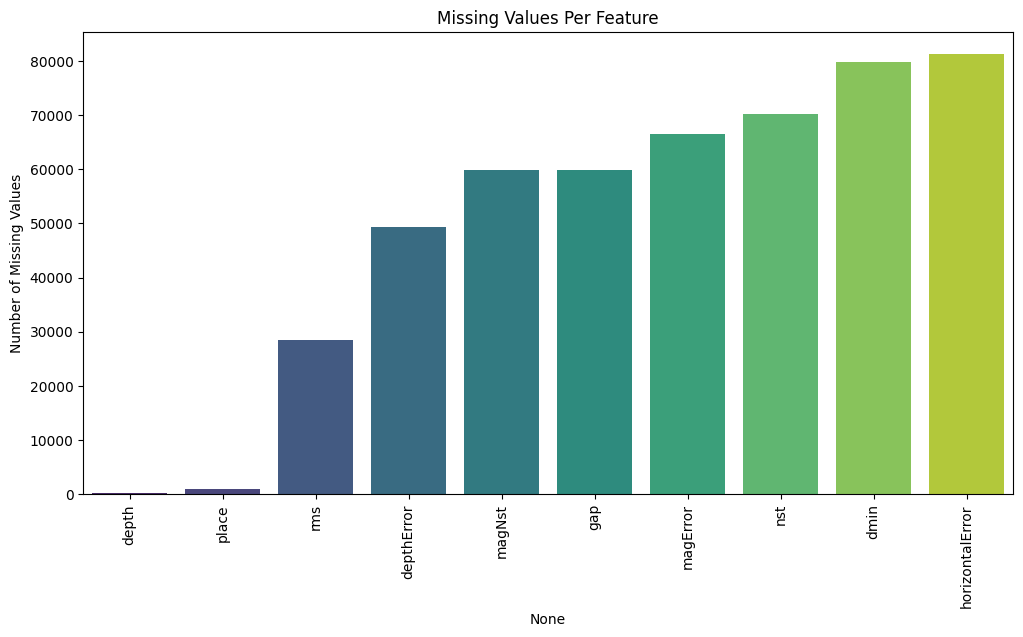

In [18]:
plt.figure(figsize=(12, 6))
missing_values = missing_values.sort_values(ascending=True)
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Feature")
plt.show()

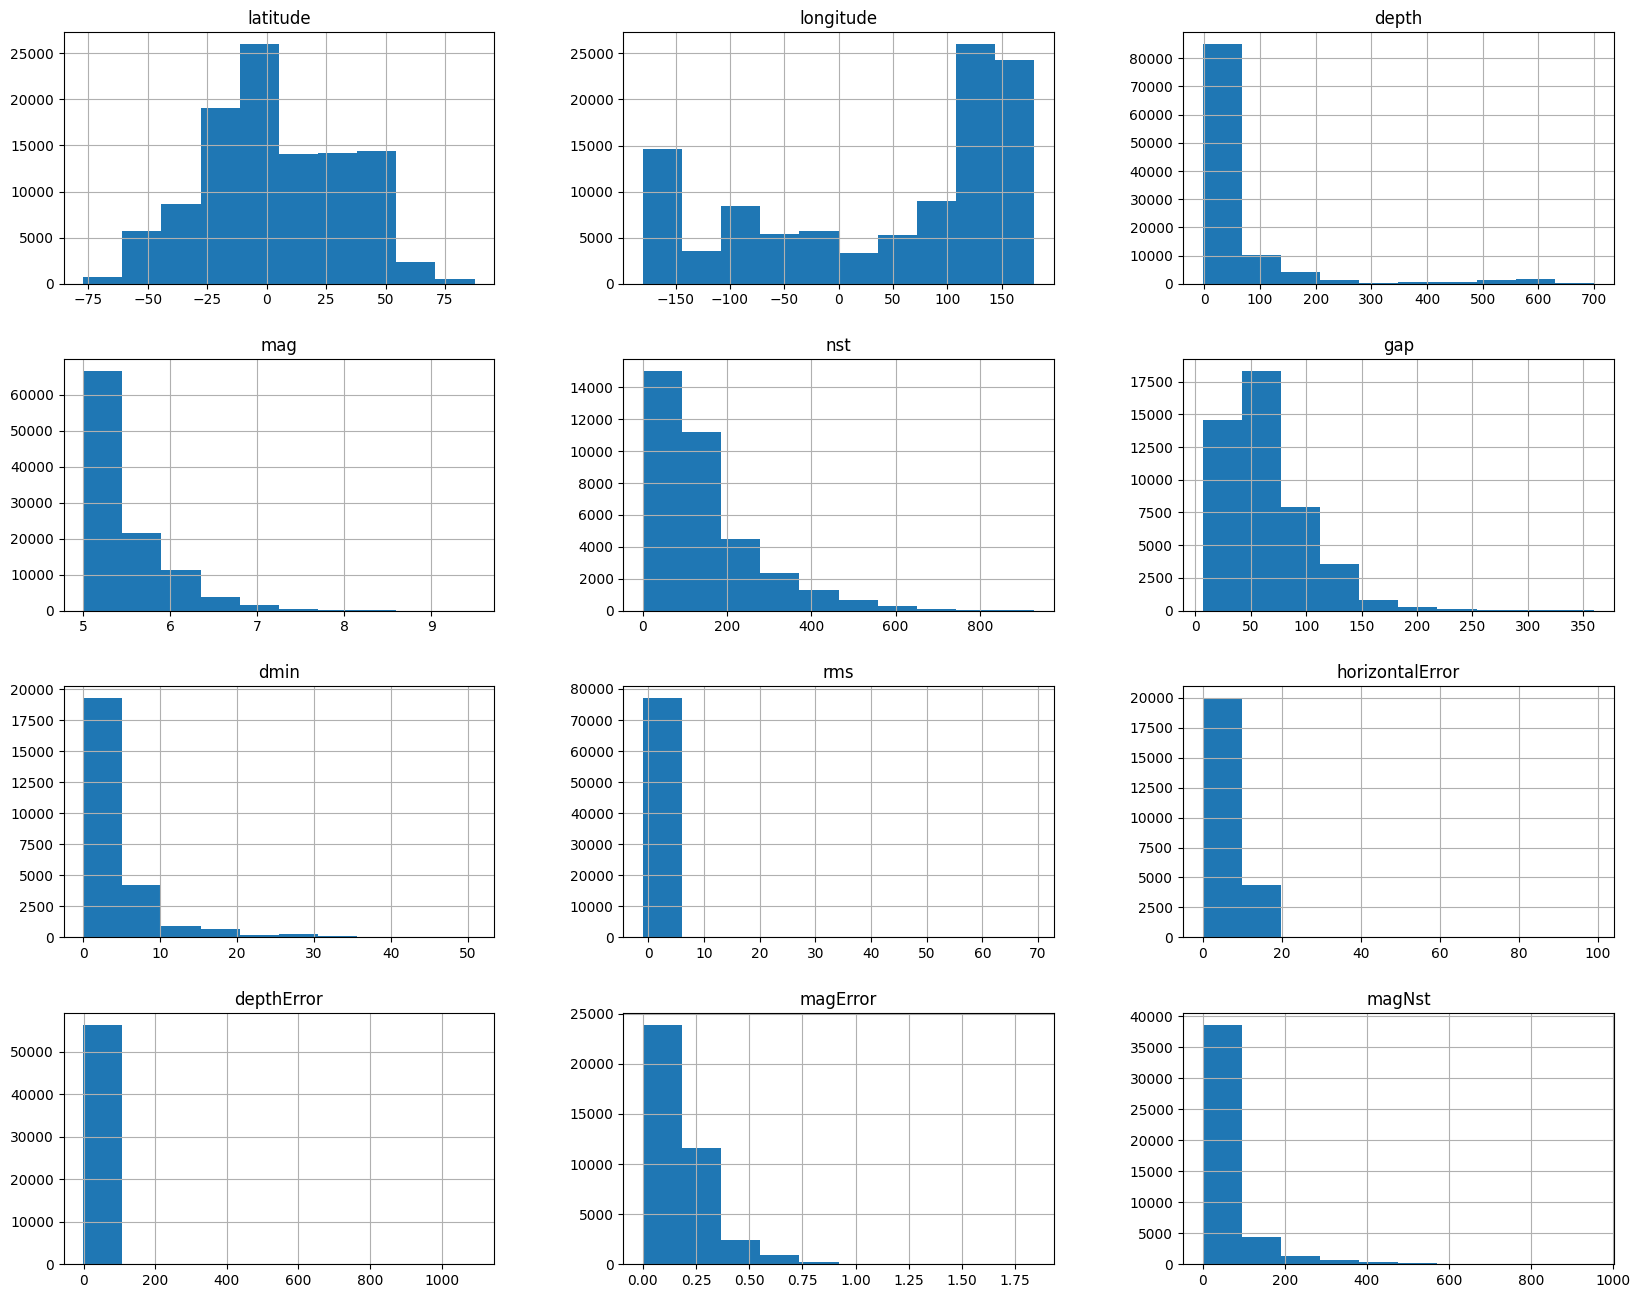

In [19]:
#analyzing each numerical column
df.hist(figsize=[20,16])
plt.show()

In [20]:
# Check skewness
# If skewness is greater than ±0.5, the feature is skewed,median is a better choice
num_col = df.select_dtypes(include=['int64','float64','int32']).columns  # year and month not included
num_col
df[num_col].skew()

latitude             0.039924
longitude           -0.644373
depth                3.701889
mag                  1.705651
nst                  1.737211
gap                  1.811897
dmin                 3.029630
rms                100.750040
horizontalError     10.759806
depthError          36.296785
magError             2.135036
magNst               3.612702
dtype: float64

In [21]:
#missing value handling
df["depth"]=df["depth"].fillna(df["depth"].median())
df["rms"]=df["rms"].fillna(df["rms"].median())
df["place"]=df["place"].fillna(df["place"].mode()[0])
df["depthError"]=df["depthError"].fillna(df["depthError"].median())
df["magNst"]=df["magNst"].fillna(df["magNst"].median())
df["gap"]=df["gap"].fillna(df["gap"].median())
df["nst"]=df["nst"].fillna(df["nst"].median())
df["dmin"]=df["dmin"].fillna(df["dmin"].median())
df["horizontalError"]=df["horizontalError"].fillna(df["horizontalError"].median())
df["magError"]=df["magError"].fillna(df["magError"].median())

Missing values were handled using the median imputation method for numerical columns and mode imputation for categorical columns

In [22]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
place              0
horizontalError    0
depthError         0
magError           0
magNst             0
locationSource     0
magSource          0
dtype: int64

# outliers

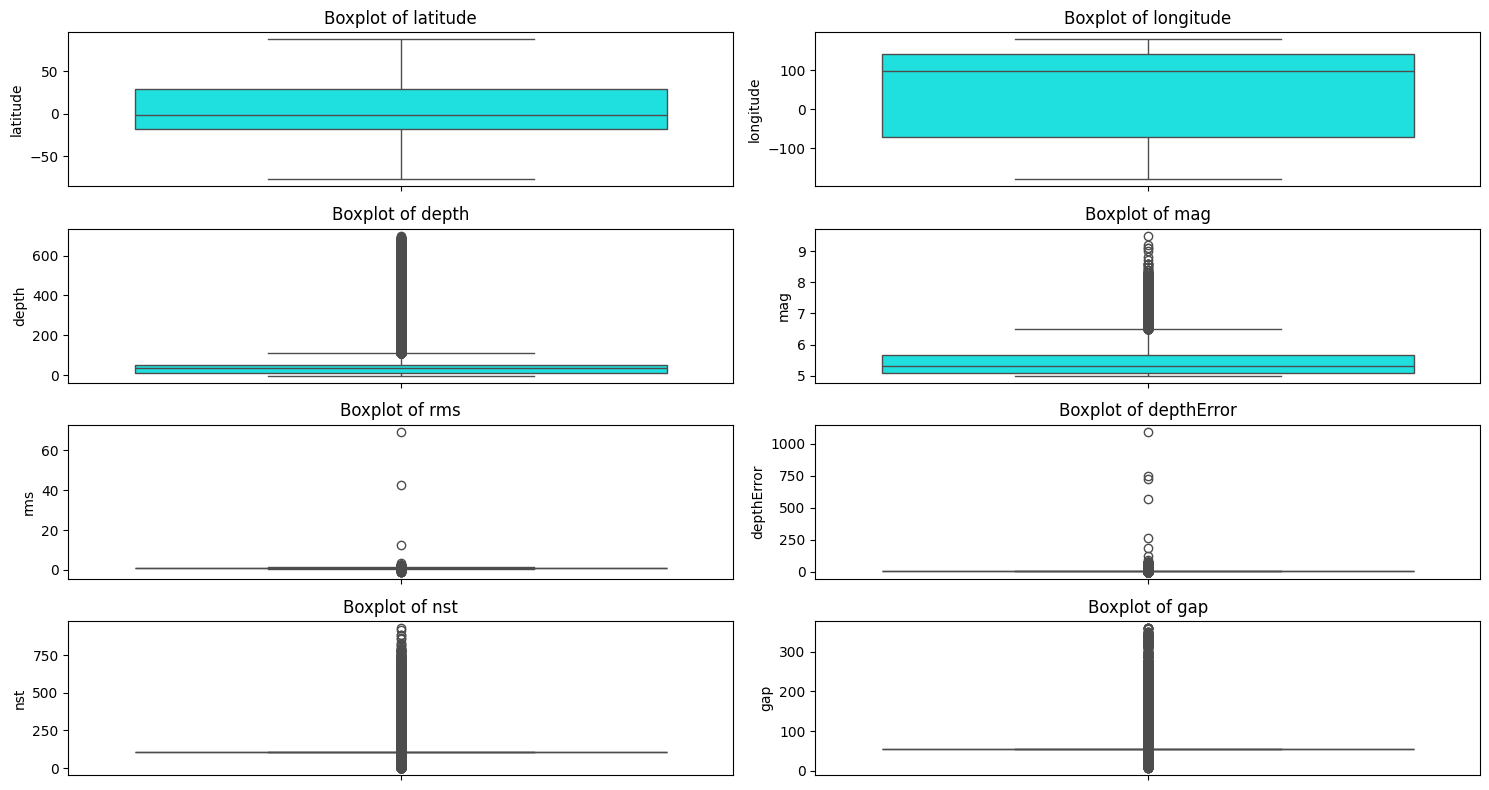

In [23]:
# List of numerical columns to analyze
num_col = ['latitude', 'longitude', 'depth', 'mag', 'rms','depthError', "nst", "gap"]


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

not to removing outliers from the dataset because in the context of earthquakes, outliers often represent significant or extreme seismic events, which are crucial for accurate modeling and prediction. These extreme values are not errors — they are real and meaningful data points that reflect the unpredictable nature of natural disasters.

Removing them could lead to a loss of important information, especially since our goal is to build a model that can also handle and predict rare but impactful events like high-magnitude earthquakes.

# Feature Engineering

In [24]:
#Convert to datetime
df['time'] = pd.to_datetime(df['time'])  # Convert 'time' column to datetime


# Extract year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

df=df.drop(["time"],axis=1)

In [25]:
# Extract the last word in the "place" column (assuming it is the country)
df["country"] = df["place"].str.split(", ").str[-1]

# Display unique country values to check correctness
country_counts = df["country"].value_counts()

# Print each country and its count
for country, count in country_counts.items():
    print(f"{country}: {count}")

df=df.drop(["place"],axis=1)

Indonesia: 12092
Papua New Guinea: 6475
Japan: 6388
Philippines: 5053
Tonga: 4360
Russia: 4307
Alaska: 3991
Vanuatu: 3467
Chile: 3404
South Sandwich Islands region: 3329
Solomon Islands: 2591
New Zealand: 1884
Mexico: 1735
Peru: 1733
China: 1723
Kermadec Islands region: 1560
Japan region: 1529
south of the Fiji Islands: 1436
Taiwan: 1105
India: 1068
Iran: 1063
Greece: 1043
Fiji: 997
Fiji region: 937
Timor Leste: 866
Argentina: 862
south of the Kermadec Islands: 854
Northern Mariana Islands: 793
New Caledonia: 785
northern Mid-Atlantic Ridge: 767
Turkey: 732
southern Mid-Atlantic Ridge: 715
Guam: 706
southeast of the Loyalty Islands: 690
Pacific-Antarctic Ridge: 674
Kuril Islands: 663
Mid-Indian Ridge: 656
central Mid-Atlantic Ridge: 632
Afghanistan: 609
Colombia: 557
southern East Pacific Rise: 543
Pakistan: 468
Guatemala: 436
Ecuador: 428
Panama: 412
Banda Sea: 372
Nicaragua: 371
Canada: 370
Myanmar: 367
California: 365
west of Macquarie Island: 351
central East Pacific Rise: 329
Mari

In [26]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'horizontalError', 'depthError', 'magError',
       'magNst', 'locationSource', 'magSource', 'year', 'month', 'day',
       'country'],
      dtype='object')

# Univariate Analysis

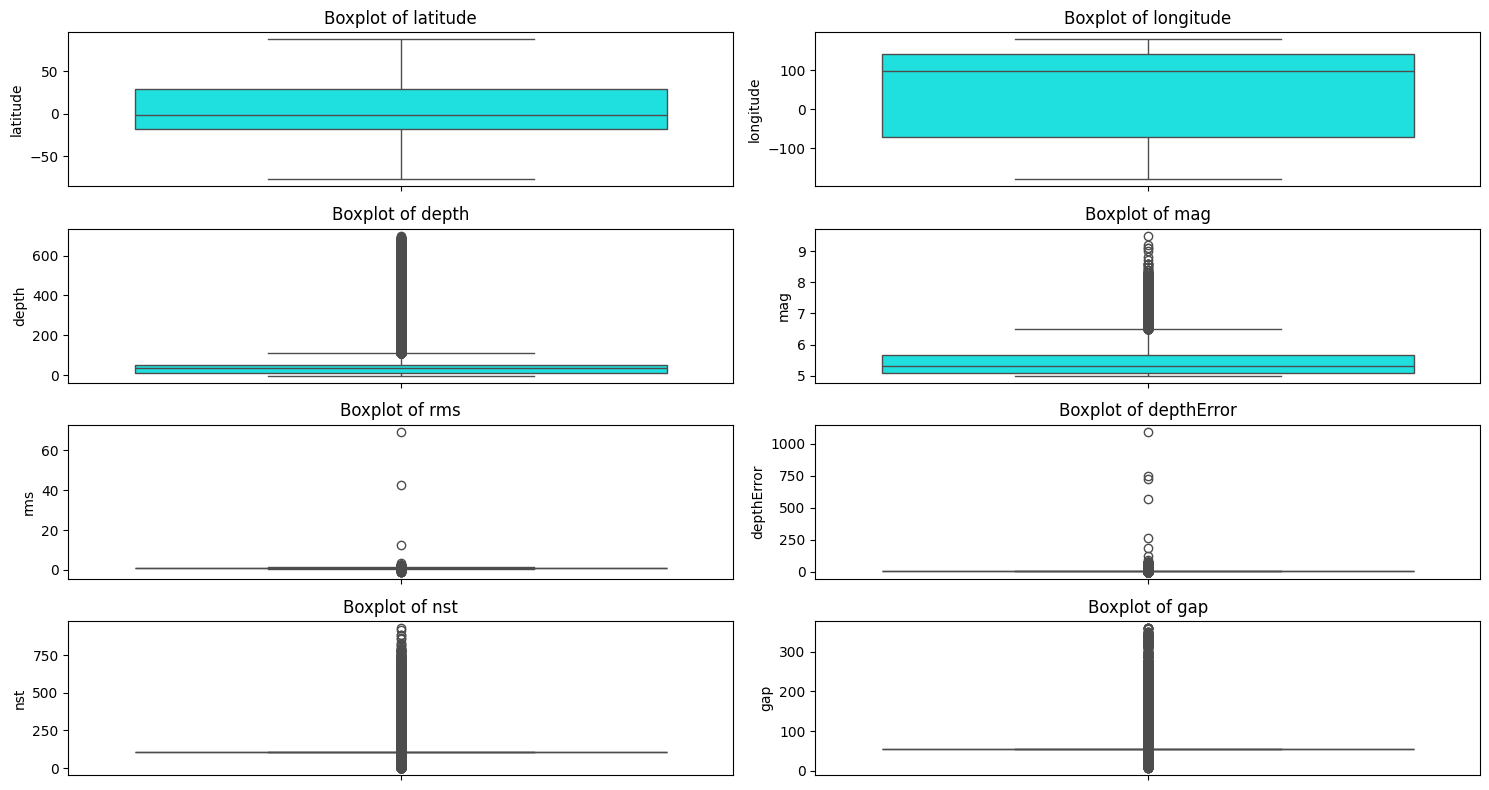

In [27]:
# List of numerical columns to analyze
num_col = ['latitude', 'longitude', 'depth', 'mag', 'rms','depthError', "nst", "gap"]


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [28]:
num_col = df.select_dtypes(include=['int64','float64','int32']).columns  # year and month not included
num_col

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst', 'year', 'month',
       'day'],
      dtype='object')

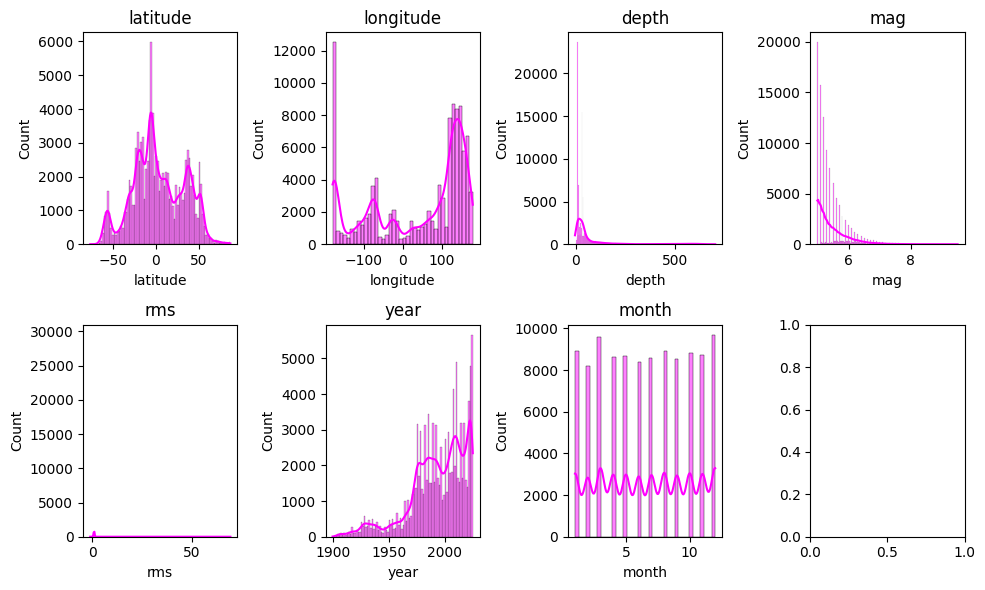

In [29]:
num_col=['latitude', 'longitude', 'depth', 'mag', 'rms', 'year', 'month']

fig,axes = plt.subplots(2,4,figsize=(10,6))
for i, column in enumerate(num_col):
  row,col =divmod(i,4) #calculate row number
  sns.histplot(data =df , x= column ,kde =True, ax = axes[row][col],color ='magenta')
  axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

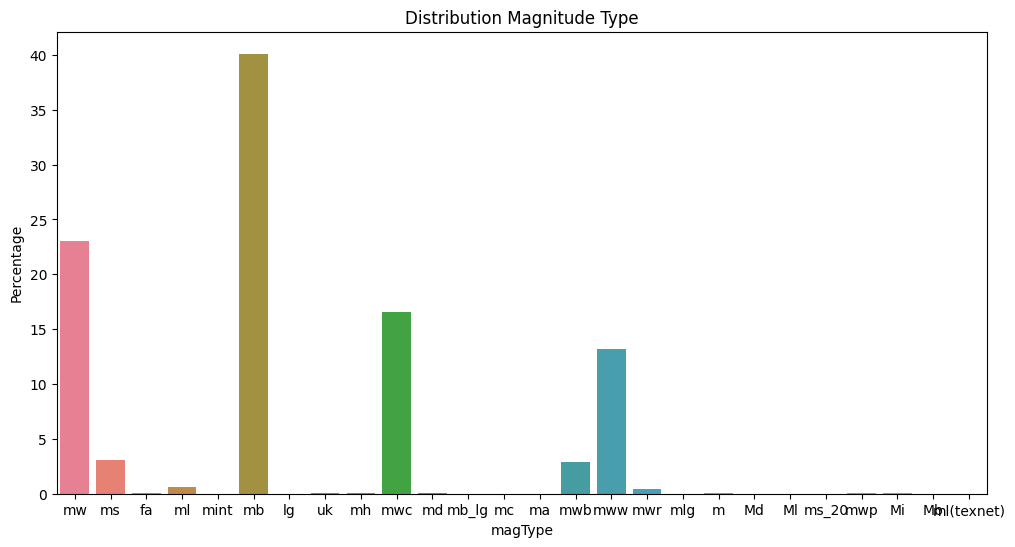

In [30]:
plt.figure(figsize=(12, 6))  # Set figure size (Width=12, Height=6)
sns.countplot(df, x="magType", hue="magType", stat="percent")
plt.ylabel('Percentage')
plt.title('Distribution Magnitude Type')
plt.show()

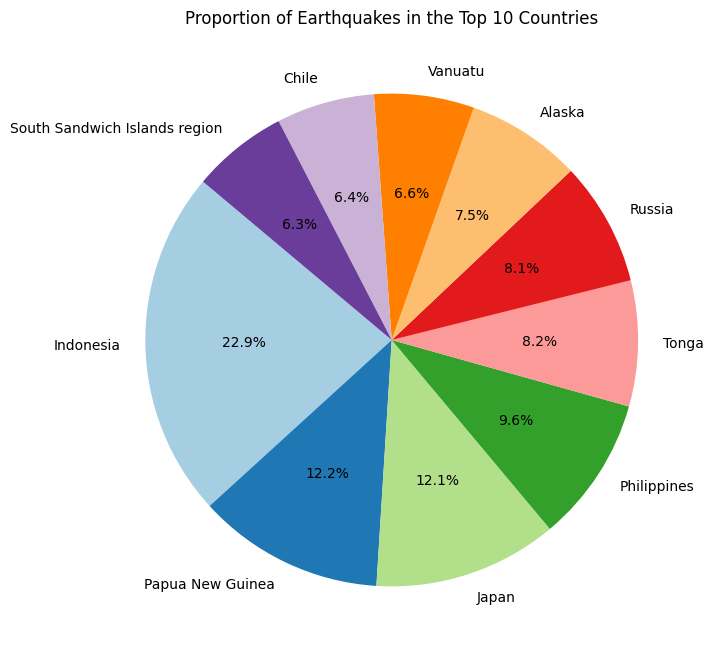

In [31]:
# Select the top 10 countries
top_countries = country_counts.head(10)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Earthquakes in the Top 10 Countries")
plt.show()

<ipython-input-32-593f85d077bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='country', y='mag', data=df_top, palette="coolwarm")


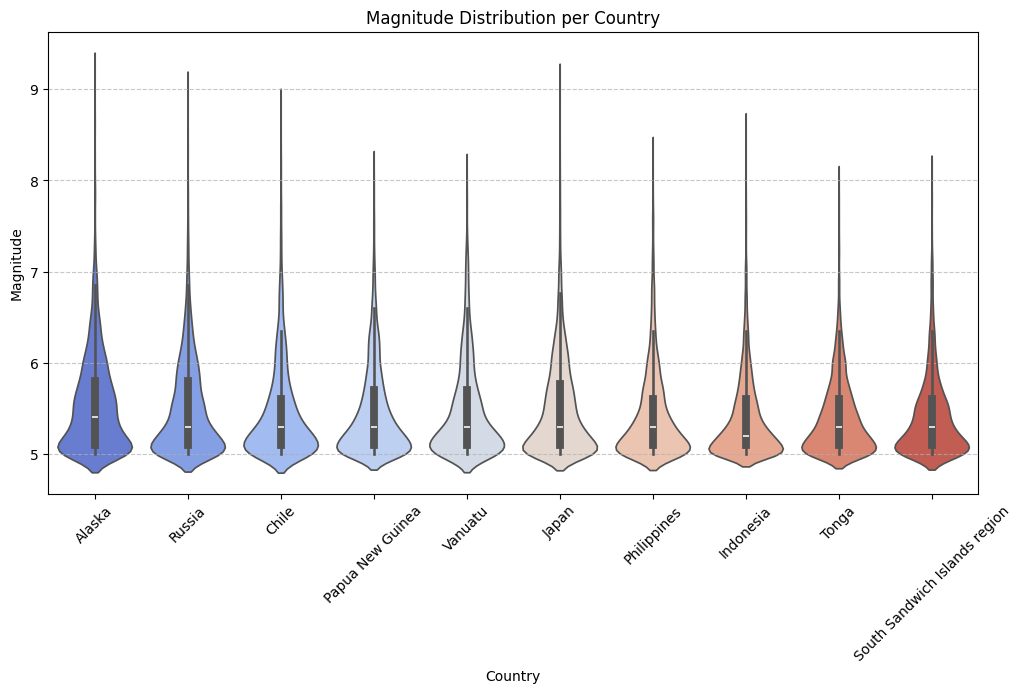

In [32]:
# Select top 10 countries with most earthquakes
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='mag', data=df_top, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Magnitude")
plt.title("Magnitude Distribution per Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


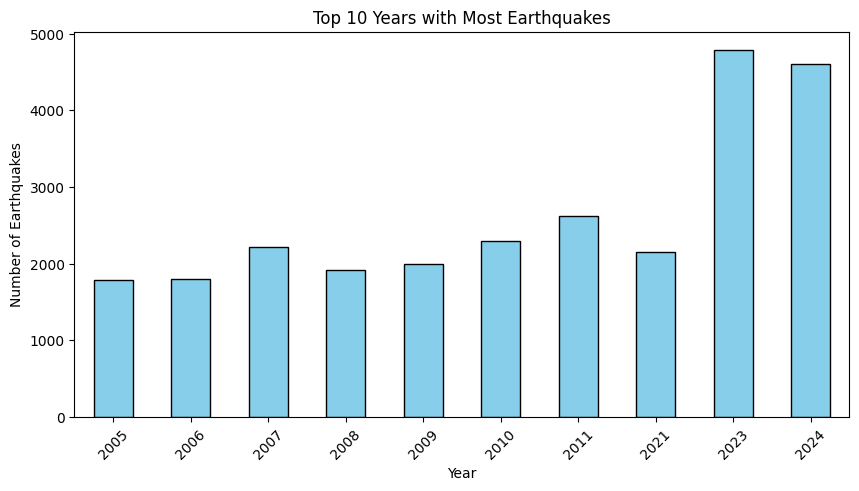

In [33]:
# Plot the top 10 years
plt.figure(figsize=(10, 5))
# Calculate and assign the top 10 years to the variable 'top_10_years'
top_10_years = df['year'].value_counts().head(10)

top_10_years.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Top 10 Years with Most Earthquakes")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

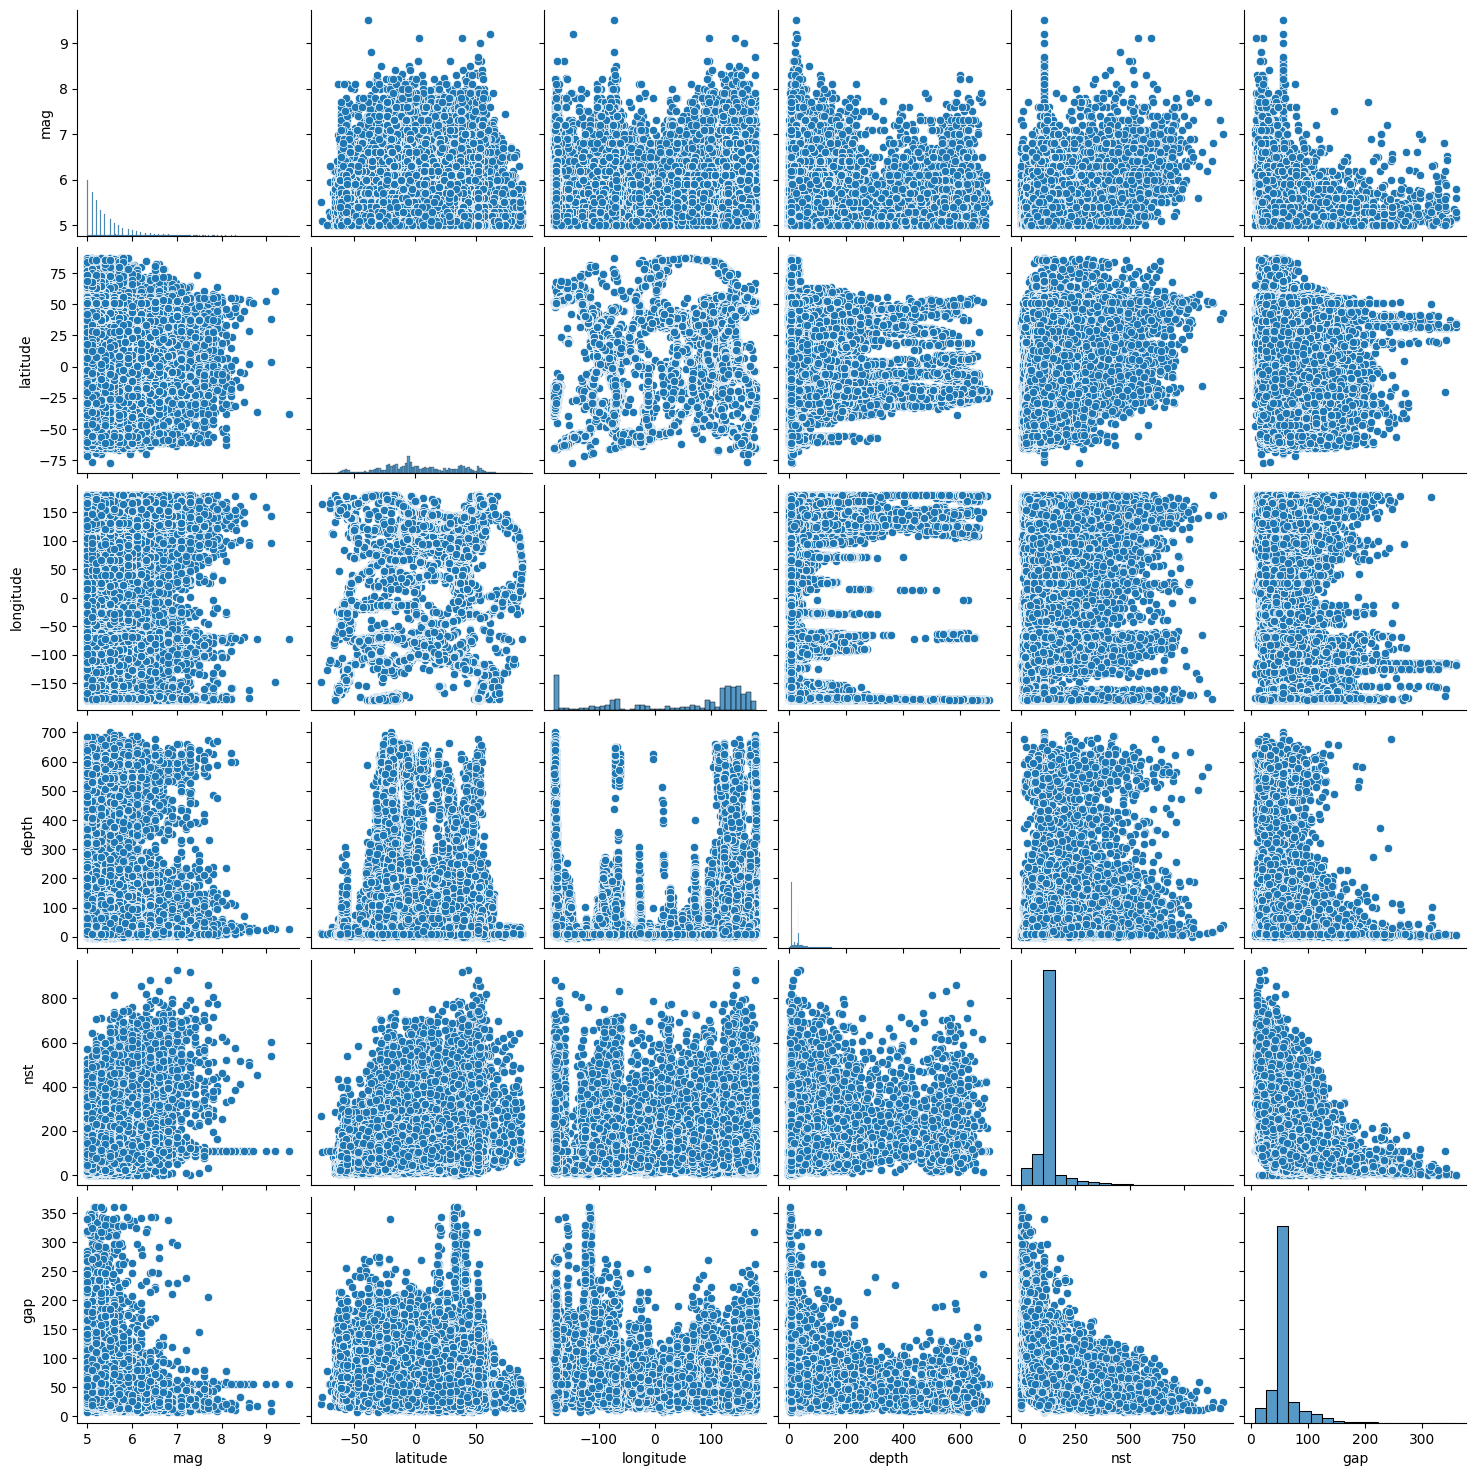

In [34]:
sns.pairplot(df[["mag", "latitude", "longitude", "depth", "nst", "gap"]])
plt.show()

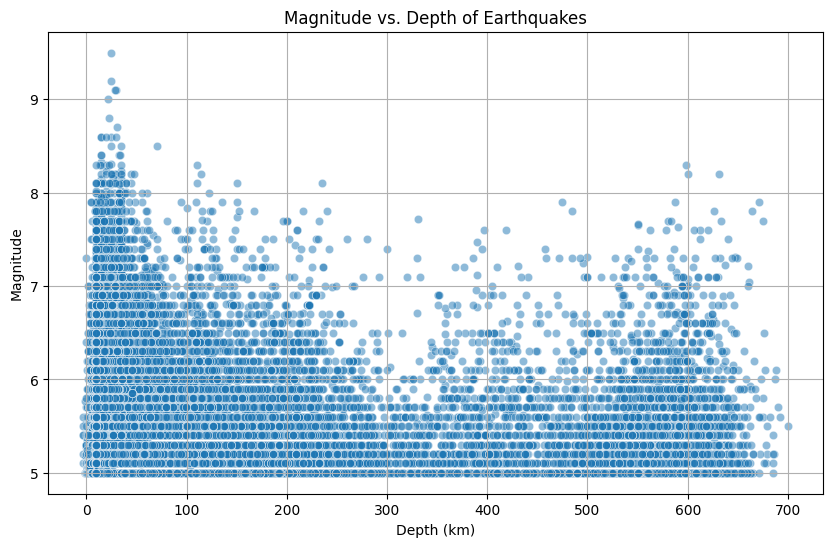

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["depth"], y=df["mag"], alpha=0.5)

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Depth of Earthquakes")
plt.grid(True)
plt.show()

The majority of earthquakes occur at depths less than 100 km (left side of the graph).

This suggests that shallow earthquakes are more frequent than deeper ones.

Magnitudes (5.0 to 9.0) appear randomly distributed across different depths.

This means that depth does not strongly influence the magnitude of an earthquake.

Both shallow and deep earthquakes can have high or low magnitudes.

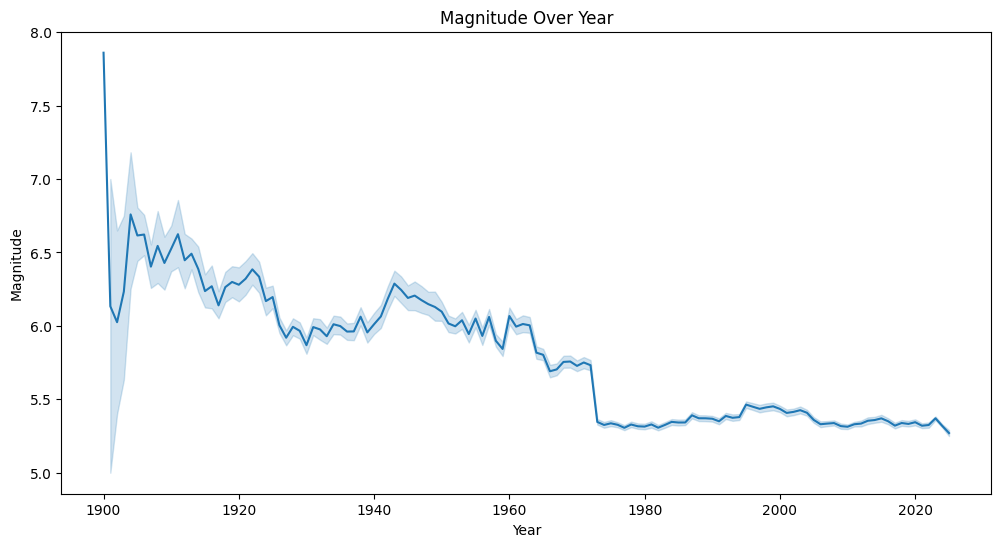

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mag', data=df)
plt.title('Magnitude Over Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()

this shows the mag of earthquake that happen from 1900 to 2025.most of the mag values lies between 5 and 8,with rare occurrance of 9 and above



The line graph illustrates the trend in average earthquake magnitudes from 1898 to 2023. In the early years, particularly around 1898, the average magnitudes were notably high, with some years exceeding 7.5. This is likely due to limited data collection at the time, where only large earthquakes were recorded. From the 1920s to the 1960s, a gradual decline in average magnitude is observed, which may reflect improvements in seismic monitoring and the inclusion of lower-magnitude events. Around 1970, there is a sharp drop in average magnitude, after which the values stabilize around 5.2 to 5.5. This sudden change suggests a shift in reporting practices or technological advancements that allowed for the detection of smaller earthquakes. Overall, the decreasing trend does not imply that earthquakes have become less severe, but rather that data collection has become more comprehensive and accurate over time.



The line graph shows a decreasing trend in average earthquake magnitude from 1898 to 2023. In the early years, the average magnitude was high due to limited data that mostly recorded strong earthquakes. Over time, especially after 1970, the average magnitude dropped and stabilized, likely due to improved technology and more comprehensive reporting of smaller quakes. This trend reflects better data collection rather than a decrease in earthquake severity.

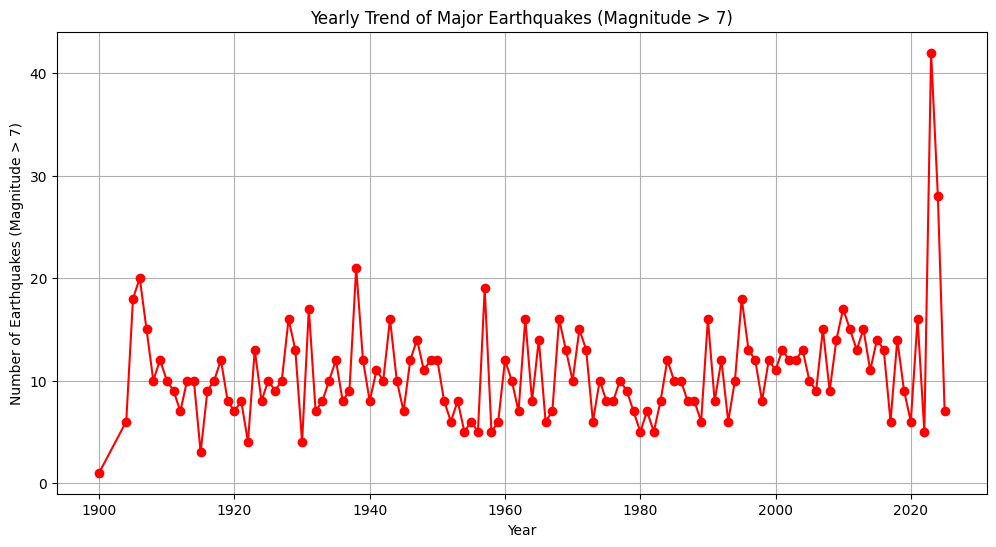

In [37]:
# Filter earthquakes with magnitude greater than 7
df_filtered = df[df['mag'] > 7]

# Count earthquakes per year
yearly_counts = df_filtered.groupby('year')['mag'].count()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='red')
# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes (Magnitude > 7)")
plt.title("Yearly Trend of Major Earthquakes (Magnitude > 7)")
plt.grid(True)
plt.show()

# Multivariate Analysis

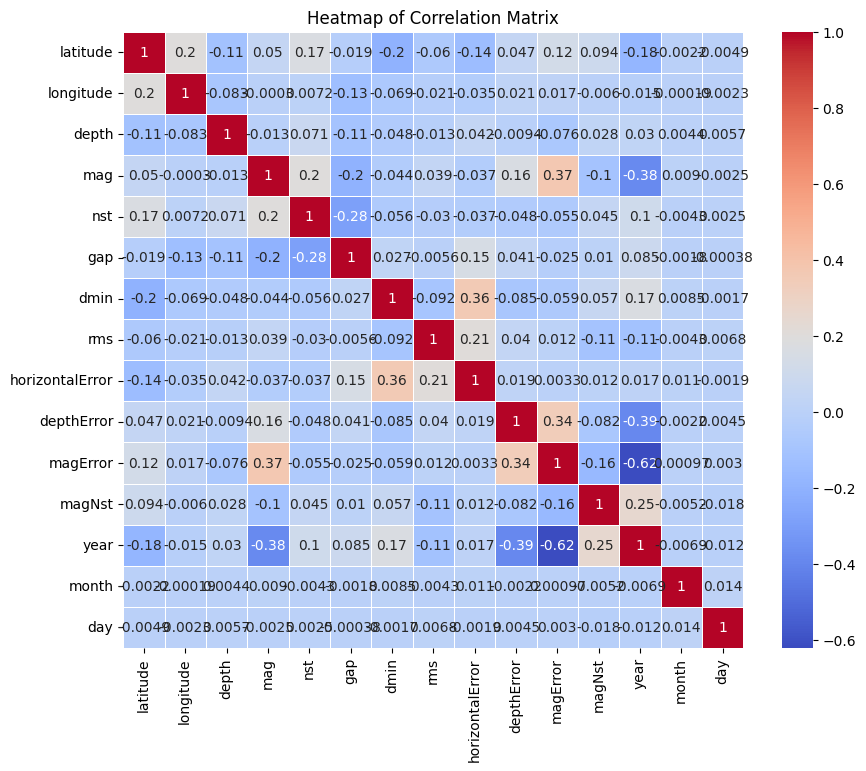

In [38]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))  # Set the size of the heat map
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heat map
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [39]:
import plotly.express as px
fig = px.scatter_geo(df, lon='longitude', lat='latitude',size='mag', animation_frame='year', projection='natural earth',title='Earthquake Animation')

fig.update_geos(
  showcoastlines=True, coastlinecolor="Red",
showland=True, landcolor="rgb(200, 200, 200)",
showocean=True, oceancolor="rgb(100, 149, 237)",
showcountries=True, countrycolor="rgb(35, 35, 35)"
)

fig.update_layout(
    height=1000,
    width= 1000
)

fig.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 66.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip



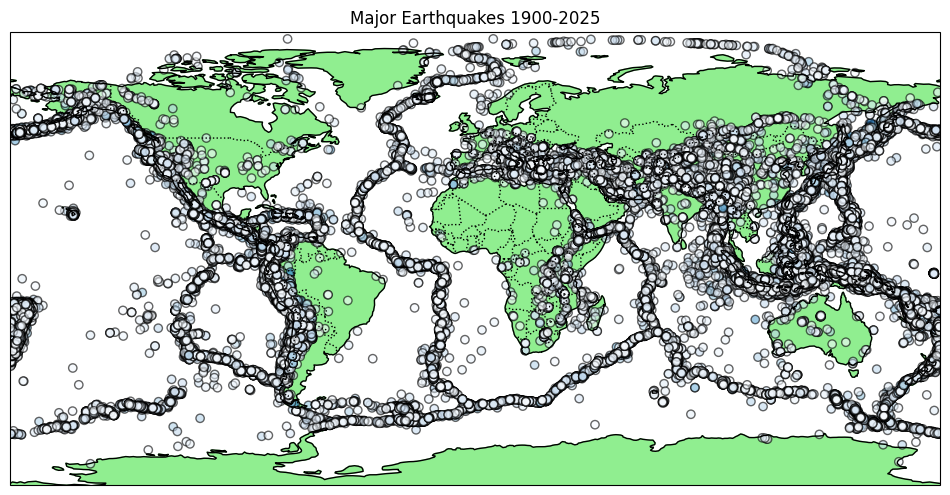

In [40]:
!pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature



# Create a figure and add a map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Add features: land, borders, and coastlines
ax.add_feature(cfeature.LAND, color="lightgreen")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)

# Scatter plot of earthquake locations
sc = ax.scatter(df['longitude'], df['latitude'],
                c=df['mag'], cmap='Blues', alpha=0.6, edgecolors="black",
                transform=ccrs.PlateCarree())

# Add title
ax.set_title("Major Earthquakes 1900-2025")

# Show the plot
plt.show()


--2025-05-03 03:36:28--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.132.161, 52.92.200.145, 52.92.235.105, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.132.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.1s    

2025-05-03 03:36:28 (1.95 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_coun

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



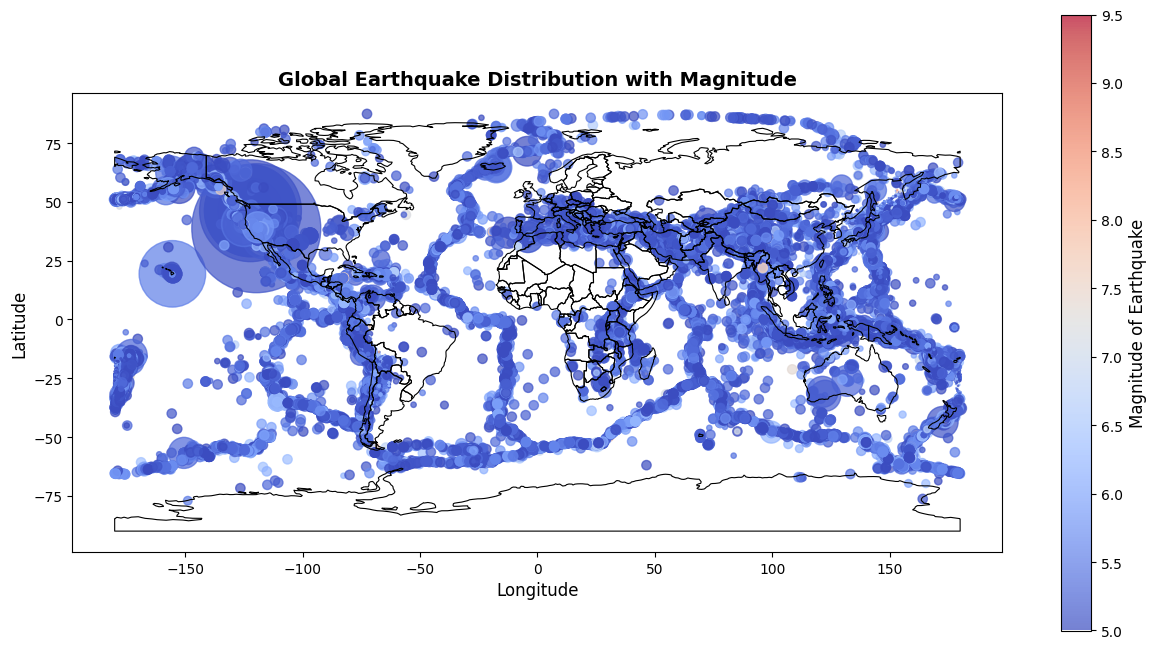

In [41]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Load world shapefile, ensure the correct path or download the file
# Download the shapefile:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

shapefile_path = "ne_110m_admin_0_countries.shp"  # Update path if necessary
world = gpd.read_file(shapefile_path)

# Define figure
fig, ax = plt.subplots(figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.8, color="black")

# Scatter plot with color based on magnitude and size based on depth
scatter = ax.scatter(
    geo_df["longitude"], geo_df["latitude"],
    c=geo_df["mag"], cmap="coolwarm", alpha=0.7,
    s=(10 / (geo_df["depth"] + 1)) * 50
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Magnitude of Earthquake", fontsize=12)
plt.title("Global Earthquake Distribution with Magnitude", fontsize=14, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

In [42]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'horizontalError', 'depthError', 'magError',
       'magNst', 'locationSource', 'magSource', 'year', 'month', 'day',
       'country'],
      dtype='object')

In [43]:
df.shape

(105595, 20)

# Encoding

In [44]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['magType'] = le.fit_transform(df['magType'])
df['net'] = le.fit_transform(df['net'])
df['country'] = le.fit_transform(df['country'])
df['locationSource'] = le.fit_transform(df['locationSource'])
df['magSource'] = le.fit_transform(df['magSource'])


In [45]:
df.head()

latitude  longitude  depth   mag  magType    nst   gap  dmin   rms  net  \
0     57.09    -153.48   33.0  7.86       19  107.0  56.0   2.6  0.95   18   
1     36.00    -120.50   33.0  6.40       17  107.0  56.0   2.6  0.95   18   
2     40.80    -115.70   33.0  5.00        4  107.0  56.0   2.6  0.95   18   
3     52.00    -160.00   33.0  7.00       17  107.0  56.0   2.6  0.95   18   
4     52.38    -167.45   33.0  7.00       17  107.0  56.0   2.6  0.95   18   

   horizontalError  depthError  magError  magNst  locationSource  magSource  \
0              7.6         4.8     0.086    28.0              81         64   
1              7.6         4.8     0.086    28.0              81         24   
2              7.6         4.8     0.086    28.0              81         73   
3              7.6         4.8     0.086    28.0              81          4   
4              7.6         4.8     0.086    28.0              81          4   

   year  month  day  country  
0  1900     10    9       11  
1  1901      3    3       62  
2  1901      7   26      247  
3  1901     12   30      491  
4  1902      1    1       11

# Heatmap

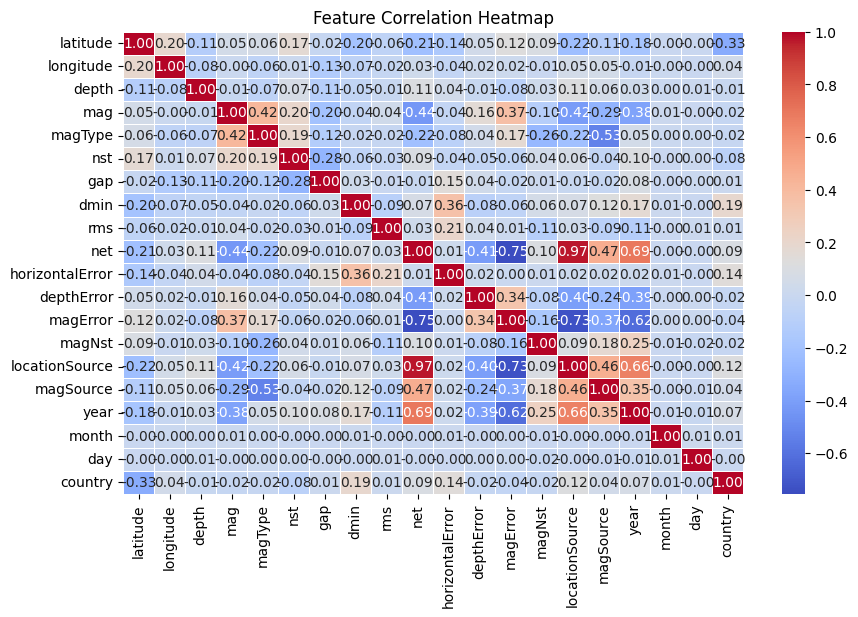

In [46]:
# Calculate the correlation matrix only for numerical features
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [47]:
df.drop(columns=['magSource','country','locationSource','depthError','net'], axis=1, inplace=True)

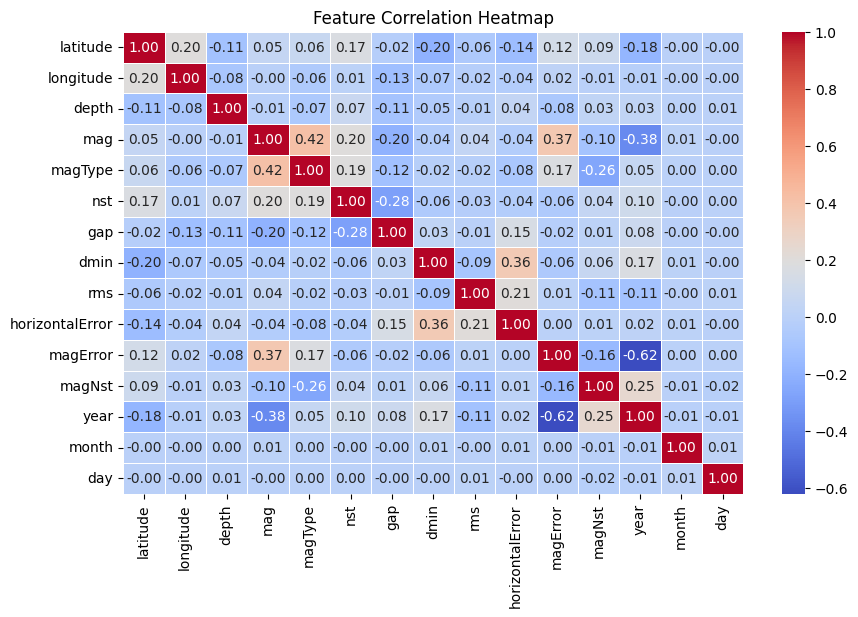

In [48]:
# Calculate the correlation matrix only for numerical features
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'magError', 'magNst', 'year', 'month',
       'day'],
      dtype='object')

In [50]:
# Select relevant columns
X = ['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap','magError',
       'dmin', 'rms', 'horizontalError', 'magNst', 'year']
y = 'mag'

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.25, random_state=42)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [56]:
print("r2 of linear regression",r2_lr)
print("mse of linear regression",mse_lr)
print("rmse of linear regression",rmse_lr)


r2 of linear regression 0.3949470052573799
mse of linear regression 0.14302138648723686
rmse of linear regression 0.3781816844946842


# SVM

In [57]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred_svm = svr.predict(X_test_scaled)

r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print(f"R²: {r2_svm:.4f}, MSE: {mse_svm:.4f}, RMSE: {rmse_svm:.4f}")


R²: 0.5332, MSE: 0.1103, RMSE: 0.3322


# Desicion Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor


# Train the model
dt= DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)


print("r2 of Decison Tree",r2_dt)
print("mse of Decision Tree",mse_dt)
print("rmse of Decision Tree",rmse_dt)

r2 of Decison Tree 0.27851893593014576
mse of Decision Tree 0.1705424533126255
rmse of Decision Tree 0.4129678599027114


# Random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [60]:
y_pred_rf= rf.predict(X_test_scaled)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Mean Squared Error (MSE): 0.0906
Mean Absolute Error (MAE): 0.1998
R² Score: 0.6168


# Hypertuning

In [62]:
# Select relevant columns
x = df[['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap',
        'dmin', 'rms', 'horizontalError','year','magNst','magError']]
y = df['mag']


In [63]:
x.head()

latitude  longitude  depth  magType    nst   gap  dmin   rms  \
0     57.09    -153.48   33.0       19  107.0  56.0   2.6  0.95   
1     36.00    -120.50   33.0       17  107.0  56.0   2.6  0.95   
2     40.80    -115.70   33.0        4  107.0  56.0   2.6  0.95   
3     52.00    -160.00   33.0       17  107.0  56.0   2.6  0.95   
4     52.38    -167.45   33.0       17  107.0  56.0   2.6  0.95   

   horizontalError  year  magNst  magError  
0              7.6  1900    28.0     0.086  
1              7.6  1901    28.0     0.086  
2              7.6  1901    28.0     0.086  
3              7.6  1901    28.0     0.086  
4              7.6  1902    28.0     0.086

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [65]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_ht=RandomForestRegressor(
    n_estimators=1500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_ht.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1500, random_state=42)

In [67]:
y_pred_rfht = rf_ht.predict(x_test_scaled)
mse_rfht = mean_squared_error(y_test, y_pred_rfht)
r2_rfht = r2_score(y_test, y_pred_rfht)
rmse_rfht = np.sqrt(mse_rfht)
print(mse_rfht)
print(r2_rfht)

0.08831387633118247
0.6263875168328072


# Train Random Forest Regressor  with nmetric=300

In [69]:
# Train Random Forest Regressor  with nmetric=300
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0884
Root Mean Squared Error: 0.2973
R² Score: 0.6260


In [71]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression','SVM', 'Decision Tree', 'Random Forest', "Random Forest Hyper Tuned","Random forest hypertuned with 300" ],
    'R2 Score': [r2_lr,r2_svm, r2_dt, r2_rf,  r2_rfht,r2],
    'MSE': [mse_lr, mse_svm, mse_dt, mse_rf, mse_rfht,mse],
    'RMSE': [rmse_lr, rmse_svm, rmse_dt, rmse_rf, rmse_rfht,rmse]
})

print(regression_results)


                               Model  R2 Score       MSE      RMSE
0                  Linear Regression  0.394947  0.143021  0.378182
1                                SVM  0.533230  0.110334  0.332166
2                      Decision Tree  0.278519  0.170542  0.412968
3                      Random Forest  0.616838  0.090571  0.300950
4          Random Forest Hyper Tuned  0.626388  0.088314  0.297177
5  Random forest hypertuned with 300  0.626017  0.088401  0.297324


In [77]:
# Save model, scaler, encoder
import pickle


# Save trained RandomForestRegressor model
with open('earthquake_model.pkl', 'wb') as f:
    pickle.dump(model, f)

import joblib
joblib.dump(model, 'earthquake_model.pkl', compress=3)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('magType_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Model, scaler, and magType encoder saved successfully using pickle.")


Model, scaler, and magType encoder saved successfully using pickle.
